In [1]:
print("Problem 1_First_Equation")

Problem 1_First_Equation


Step 1: Hessian = Matrix([[6, 4], [4, 6]])
Eigenvalues: {10: 1, 2: 1}
Polishing not needed - no active set detected at optimal point

Step 2: CVXPY Solution x* = [-0.60000171  0.40000114]
Optimal value f(x*) = 0.40000000000484803

Step 3: Symbolic Solution x* = {x1: -3/5, x2: 2/5}
Optimal value f(x*) = 2/5

Step 4: GD Solution x* = [-0.59999708  0.39999708]
GD f(x*) = 0.40000000001708813


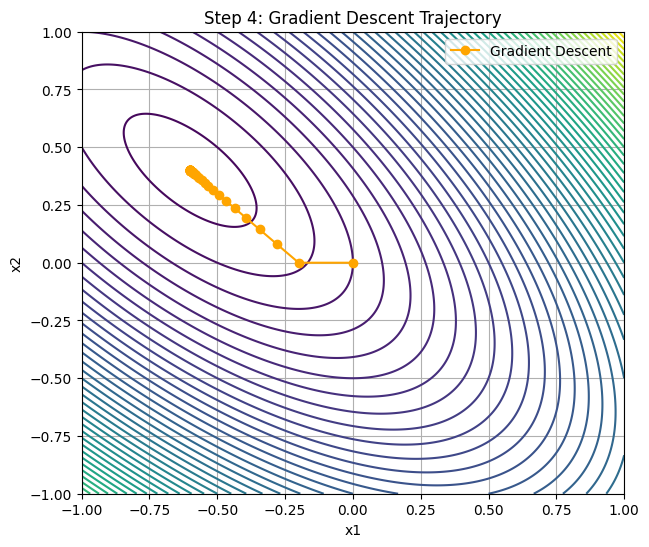


Step 5: Steepest GD Solution x* = [-0.59999861  0.39999907]
Steepest GD f(x*) = 0.4000000000032232


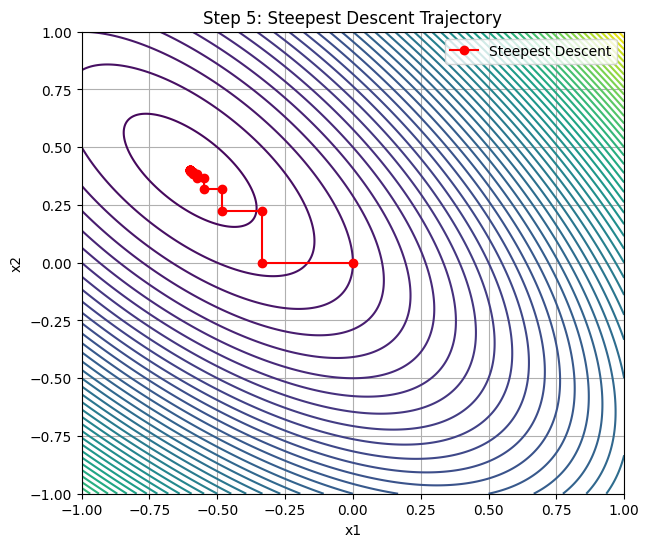

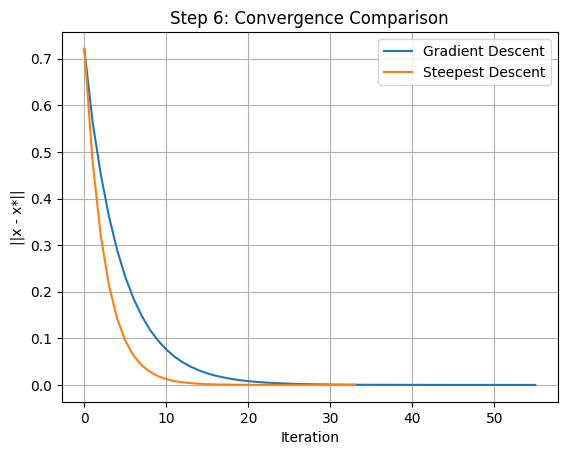

In [3]:
# Convex Optimization Workflow for f1(x1, x2)

import numpy as np  # Import NumPy for numerical operations
import sympy as sp  # Import SymPy for symbolic math
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import cvxpy as cp  # Import CVXPY for convex optimization

# ----------------------
# Step 1: Convexity Proof via Hessian
# ----------------------
x1, x2 = sp.symbols('x1 x2')  # Define symbolic variables
f1_sym = 1 + 2*x1 + 3*(x1**2 + x2**2) + 4*x1*x2  # Define the symbolic form of f1
hessian_f1 = sp.hessian(f1_sym, (x1, x2))  # Compute the Hessian matrix
eigenvals = hessian_f1.eigenvals()  # Compute the eigenvalues of the Hessian
print("Step 1: Hessian =", hessian_f1)  # Print the Hessian matrix
print("Eigenvalues:", eigenvals)  # Print the eigenvalues

# ----------------------
# Step 2: CVXPY Optimization
# ----------------------
x = cp.Variable(2)  # Define the optimization variable x (2D vector)
Q = np.array([[6, 4], [4, 6]]) / 2  # Define the symmetric quadratic coefficient matrix
c = np.array([2, 0])  # Define the linear coefficient vector
r = 1  # Define the constant term
f1_expr = cp.quad_form(x, Q) + c @ x + r  # Define the objective function in quad_form
problem = cp.Problem(cp.Minimize(f1_expr))  # Define the optimization problem (minimize f1)
problem.solve()  # Solve the problem
cvx_solution = x.value  # Get the optimal solution x*
cvx_optval = problem.value  # Get the optimal objective value
print("\nStep 2: CVXPY Solution x* =", cvx_solution)  # Print the optimal x*
print("Optimal value f(x*) =", cvx_optval)  # Print the optimal value

# ----------------------
# Step 3: Symbolic Gradient Solution
# ----------------------
grad_f1_sym = [sp.diff(f1_sym, x1), sp.diff(f1_sym, x2)]  # Compute symbolic gradients
sol_f1 = sp.solve(grad_f1_sym, (x1, x2))  # Solve gradient = 0
optval_f1 = f1_sym.subs(sol_f1)  # Substitute solution into original function
print("\nStep 3: Symbolic Solution x* =", sol_f1)  # Print the symbolic solution
print("Optimal value f(x*) =", optval_f1)  # Print function value at solution

# ----------------------
# Step 4: Gradient Descent (Fixed Step)
# ----------------------
def f1(x):  # Define the numerical function f1
    return 1 + 2*x[0] + 3*(x[0]**2 + x[1]**2) + 4*x[0]*x[1]

def grad_f1(x):  # Define the gradient of f1
    return np.array([2 + 6*x[0] + 4*x[1], 6*x[1] + 4*x[0]])

def gradient_descent(grad_func, init_x, lr=0.1, tol=1e-6, max_iter=1000):  # GD function
    x = init_x.copy()  # Initialize x
    history = [x.copy()]  # Save initial point
    for _ in range(max_iter):  # Iterate up to max_iter
        grad = grad_func(x)  # Compute gradient
        x_new = x - lr * grad  # Take gradient descent step
        history.append(x_new.copy())  # Save the new point
        if np.linalg.norm(x_new - x) < tol:  # Check for convergence
            break
        x = x_new  # Update x
    return x, np.array(history)  # Return solution and path

x0 = np.array([0.0, 0.0])  # Set initial point
gd_x, gd_traj = gradient_descent(grad_f1, x0)  # Run gradient descent
print("\nStep 4: GD Solution x* =", gd_x)  # Print GD solution
print("GD f(x*) =", f1(gd_x))  # Print GD function value

# Step 4 Plot
x1_vals = np.linspace(-1, 1, 400)  # x1 range for contour plot
x2_vals = np.linspace(-1, 1, 400)  # x2 range for contour plot
X1, X2 = np.meshgrid(x1_vals, x2_vals)  # Create meshgrid
Z = f1([X1, X2])  # Evaluate f1 over the grid

plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Draw contour lines
plt.plot(gd_traj[:, 0], gd_traj[:, 1], 'o-', color='orange', label='Gradient Descent')  # Plot trajectory
plt.title("Step 4: Gradient Descent Trajectory")  # Set plot title
plt.xlabel("x1")  # X-axis label
plt.ylabel("x2")  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 5: Steepest Descent (Optimal Step)
# ----------------------
def steepest_descent(grad_func, f_func, init_x, tol=1e-6, max_iter=1000):  # Steepest descent
    x = init_x.copy()  # Initialize x
    history = [x.copy()]  # Save initial point
    for _ in range(max_iter):  # Iterate
        grad = grad_func(x)  # Compute gradient
        d = -grad  # Descent direction
        alpha = sp.Symbol('a', real=True)  # Define symbolic alpha
        expr = f_func(x + alpha * d)  # f(x + alpha*d)
        alpha_star = sp.solve(sp.diff(expr, alpha), alpha)  # Solve df/da = 0
        alpha_val = float(alpha_star[0]) if alpha_star else 0.01  # Use first valid solution
        x_new = x + alpha_val * d  # Update x using optimal alpha
        history.append(x_new.copy())  # Save the new point
        if np.linalg.norm(x_new - x) < tol:  # Check for convergence
            break
        x = x_new  # Update x
    return x, np.array(history)  # Return result and path

sd_x, sd_traj = steepest_descent(grad_f1, f1, x0)  # Run steepest descent
print("\nStep 5: Steepest GD Solution x* =", sd_x)  # Print result
print("Steepest GD f(x*) =", f1(sd_x))  # Print value

# Step 5 Plot
plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Draw contour lines
plt.plot(sd_traj[:, 0], sd_traj[:, 1], 'o-', color='red', label='Steepest Descent')  # Plot path
plt.title("Step 5: Steepest Descent Trajectory")  # Set title
plt.xlabel("x1")  # X-axis label
plt.ylabel("x2")  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 6: Convergence Comparison
# ----------------------
x_star = np.array([-0.6, 0.4])  # Known optimal solution
gd_traj = np.array(gd_traj)  # Convert GD trajectory to array
sd_traj = np.array(sd_traj)  # Convert SD trajectory to array

plt.plot(np.linalg.norm(gd_traj - x_star, axis=1), label='Gradient Descent')  # Plot GD convergence
plt.plot(np.linalg.norm(sd_traj - x_star, axis=1), label='Steepest Descent')  # Plot SD convergence
plt.xlabel('Iteration')  # X-axis label
plt.ylabel('||x - x*||')  # Y-axis label
plt.title('Step 6: Convergence Comparison')  # Set title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot


In [4]:
print("Problem 1_Second_Equation")

Problem 1_Second_Equation


Step 1: Hessian = Matrix([[6, 4], [4, 6]])
Eigenvalues: {10: 1, 2: 1}
Polishing not needed - no active set detected at optimal point

Step 2: CVXPY Solution x* = [-0.20000057 -3.70001052]
Optimal value f(x*) = -34.28039559855384

Step 3: Symbolic Solution x* = {x1: -1/5, x2: -37/10}
Optimal value f(x*) = -883/20 + pi**2

Step 4: GD Solution x* = [ 1.74999392 -4.41666316]
GD f(x*) = -26.92210366849343


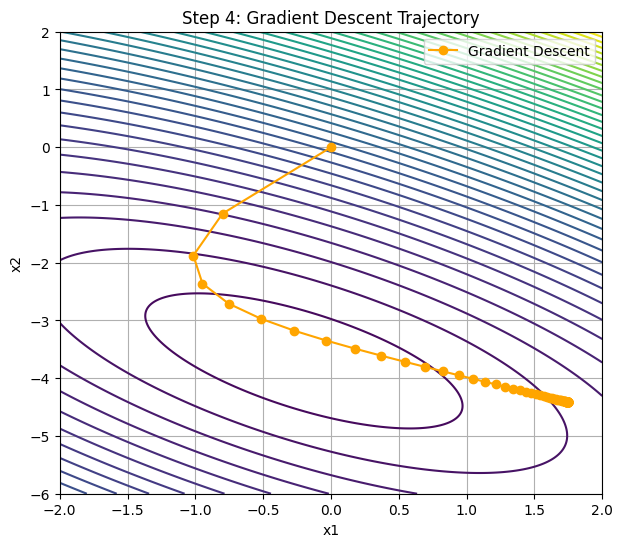


Step 5: Steepest GD Solution x* = [-0.3311932  -3.30700975]
Steepest GD f(x*) = -33.97166722109273


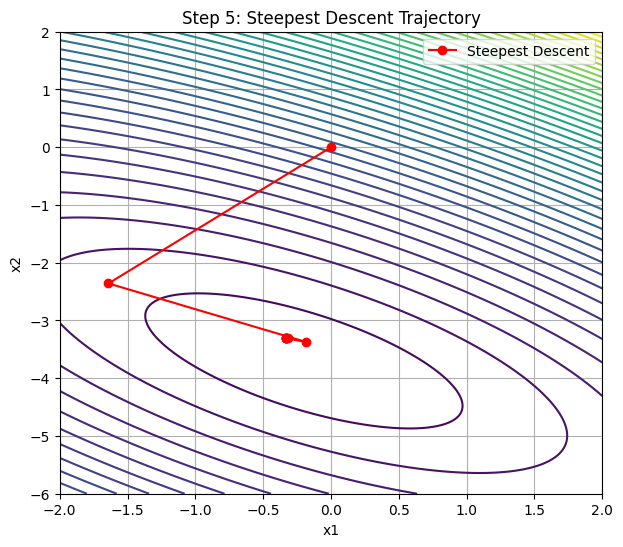

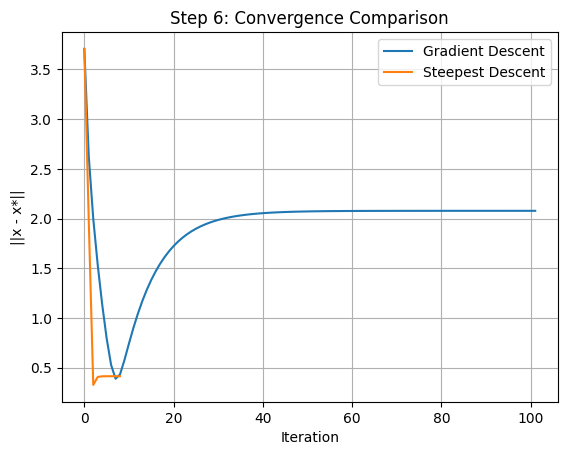

In [5]:
# Convex Optimization Workflow for f2(x1, x2)

import numpy as np  # Numerical computing library
import sympy as sp  # Symbolic computation library
import matplotlib.pyplot as plt  # Plotting library
import cvxpy as cp  # Convex optimization library

# ----------------------
# Step 1: Convexity Proof via Hessian
# ----------------------
x1, x2 = sp.symbols('x1 x2')  # Define symbolic variables
x_vec = sp.Matrix([x1, x2])  # Define vector for quadratic form
Q_sym = sp.Matrix([[3, 3], [1, 3]])  # Define symbolic Q matrix (not symmetric)
c_sym = sp.Matrix([16, 23])  # Define symbolic linear term
f2_sym = (x_vec.T * Q_sym * x_vec)[0] + (c_sym.T * x_vec)[0] + sp.pi**2  # Symbolic form of the function
hessian_f2 = sp.hessian(f2_sym, (x1, x2))  # Compute the Hessian matrix
eigenvals_f2 = hessian_f2.eigenvals()  # Compute eigenvalues to verify convexity
print("Step 1: Hessian =", hessian_f2)  # Print Hessian
print("Eigenvalues:", eigenvals_f2)  # Print eigenvalues

# ----------------------
# Step 2: CVXPY Optimization
# ----------------------
x = cp.Variable(2)  # Define optimization variable (vector)
Q = np.array([[3, 3], [1, 3]])  # Original Q matrix
Q_symmetrized = (Q + Q.T) / 2  # Make Q symmetric for quad_form
c = np.array([16, 23])  # Linear coefficient vector
f2_expr = cp.quad_form(x, Q_symmetrized) + c @ x + np.pi**2  # CVXPY expression for objective
problem = cp.Problem(cp.Minimize(f2_expr))  # Define minimization problem
problem.solve()  # Solve the problem
cvx_solution = x.value  # Get the optimal x
cvx_optval = problem.value  # Get the optimal objective value
print("\nStep 2: CVXPY Solution x* =", cvx_solution)  # Print solution
print("Optimal value f(x*) =", cvx_optval)  # Print optimal value

# ----------------------
# Step 3: Symbolic Gradient Solution
# ----------------------
grad_f2_sym = [sp.diff(f2_sym, x1), sp.diff(f2_sym, x2)]  # Compute symbolic gradient
sol_f2 = sp.solve(grad_f2_sym, (x1, x2))  # Solve for stationary point
optval_f2 = f2_sym.subs(sol_f2)  # Substitute solution into function
print("\nStep 3: Symbolic Solution x* =", sol_f2)  # Print symbolic solution
print("Optimal value f(x*) =", optval_f2)  # Print value at solution

# ----------------------
# Step 4: Gradient Descent (Fixed Step)
# ----------------------
def f2(x):  # Define the function f2
    return x @ Q @ x + c @ x + np.pi**2  # Quadratic form + linear + constant

def grad_f2(x):  # Define gradient of f2
    return 2 * Q @ x + c  # Derivative of quadratic function

def gradient_descent(grad_func, init_x, lr=0.05, tol=1e-6, max_iter=1000):  # GD algorithm
    x = init_x.copy()  # Copy initial point
    history = [x.copy()]  # Initialize history list
    for _ in range(max_iter):  # Iterate
        grad = grad_func(x)  # Compute gradient
        x_new = x - lr * grad  # Gradient step
        history.append(x_new.copy())  # Save path
        if np.linalg.norm(x_new - x) < tol:  # Check convergence
            break
        x = x_new  # Update x
    return x, np.array(history)  # Return result and history

x0 = np.array([0.0, 0.0])  # Set initial point
gd_x, gd_traj = gradient_descent(grad_f2, x0)  # Run gradient descent
print("\nStep 4: GD Solution x* =", gd_x)  # Print GD result
print("GD f(x*) =", f2(gd_x))  # Print function value at GD result

# Step 4 Plot
x1_vals = np.linspace(-2, 2, 400)  # Range for x1 values
x2_vals = np.linspace(-6, 2, 400)  # Range for x2 values
X1, X2 = np.meshgrid(x1_vals, x2_vals)  # Create meshgrid for contour
Z = np.array([[f2(np.array([x, y])) for x in x1_vals] for y in x2_vals])  # Evaluate f2 over grid

plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Contour plot
gd_traj = np.array(gd_traj)  # Convert trajectory to array
plt.plot(gd_traj[:, 0], gd_traj[:, 1], 'o-', color='orange', label='Gradient Descent')  # Plot path
plt.title("Step 4: Gradient Descent Trajectory")  # Title
plt.xlabel("x1")  # X-axis label
plt.ylabel("x2")  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 5: Steepest Descent (Optimal Step)
# ----------------------
def steepest_descent(grad_func, f_func, init_x, tol=1e-6, max_iter=1000):  # Steepest descent
    x = init_x.copy()  # Initialize point
    history = [x.copy()]  # Initialize path list
    for _ in range(max_iter):  # Iterate
        grad = grad_func(x)  # Compute gradient
        d = -grad  # Descent direction
        alpha = sp.Symbol('a', real=True)  # Symbolic step size
        expr = f_func(x + alpha * d)  # Construct symbolic expression
        alpha_star = sp.solve(sp.diff(expr, alpha), alpha)  # Solve for optimal step
        alpha_val = float(alpha_star[0]) if alpha_star else 0.01  # Use first valid step
        x_new = x + alpha_val * d  # Update x
        history.append(x_new.copy())  # Save step
        if np.linalg.norm(x_new - x) < tol:  # Check convergence
            break
        x = x_new  # Update current point
    return x, np.array(history)  # Return final point and history

sd_x, sd_traj = steepest_descent(grad_f2, f2, x0)  # Run steepest descent
print("\nStep 5: Steepest GD Solution x* =", sd_x)  # Print result
print("Steepest GD f(x*) =", f2(sd_x))  # Print function value

# Step 5 Plot
plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Contour plot
plt.plot(sd_traj[:, 0], sd_traj[:, 1], 'o-', color='red', label='Steepest Descent')  # Plot path
plt.title("Step 5: Steepest Descent Trajectory")  # Title
plt.xlabel("x1")  # X-axis label
plt.ylabel("x2")  # Y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 6: Convergence Comparison
# ----------------------
x_star = np.array(list(sol_f2.values()), dtype=float)  # Convert symbolic solution to numpy array
plt.plot(np.linalg.norm(gd_traj - x_star, axis=1), label='Gradient Descent')  # Plot GD convergence
plt.plot(np.linalg.norm(sd_traj - x_star, axis=1), label='Steepest Descent')  # Plot SD convergence
plt.xlabel('Iteration')  # X-axis label
plt.ylabel('||x - x*||')  # Y-axis label
plt.title('Step 6: Convergence Comparison')  # Plot title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot


In [6]:
print("Problem1_Third_Equation")

Problem1_Third_Equation


Step 1: Hessian = Matrix([[6, 4], [4, 6]])
Eigenvalues: {10: 1, 2: 1}
Polishing not needed - no active set detected at optimal point

Step 2: CVXPY Solution x* = [-0.30000085 -0.80000227]
Optimal value f(x*) = 3.8500000000254593

Step 3: Symbolic Solution x* = {x: -3/10, y: -4/5}
Optimal value f(x*) = 77/20

Step 4: GD Solution x* = [-0.30000285 -0.79999715]
GD f(x*) = 3.8500000000162973


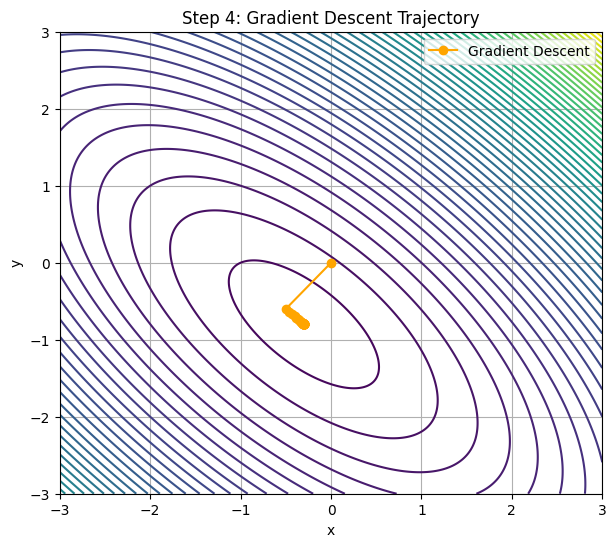


Step 5: Steepest GD Solution x* = [-0.29999988 -0.79999967]
Steepest GD f(x*) = 3.8500000000005388


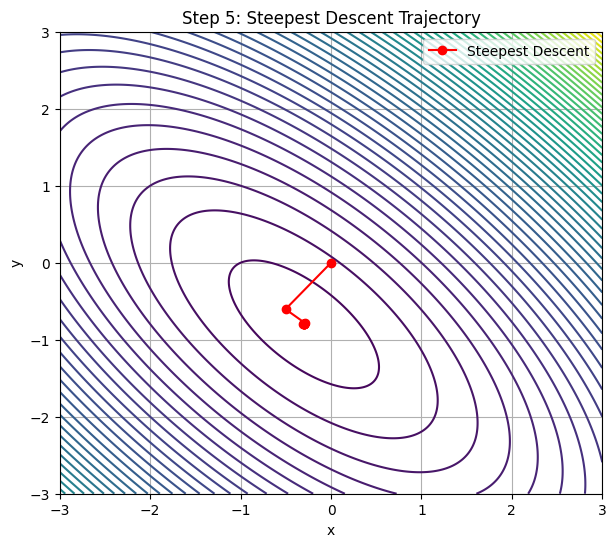

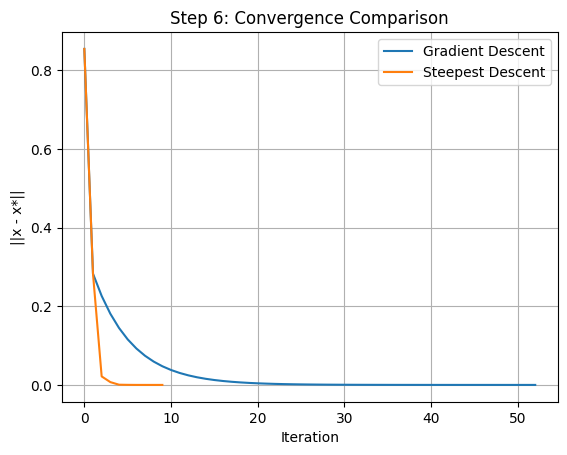

In [7]:
# Convex Optimization Workflow for f3(x, y)

import numpy as np  # Numerical computing library
import sympy as sp  # Symbolic computation library
import matplotlib.pyplot as plt  # Plotting library
import cvxpy as cp  # Convex optimization library

# ----------------------
# Step 1: Convexity Proof via Hessian
# ----------------------
x, y = sp.symbols('x y')  # Define symbolic variables
f3_sym = 3*(x**2 + y**2) + 4*x*y + 5*x + 6*y + 7  # Symbolic expression of the function
hessian_f3 = sp.hessian(f3_sym, (x, y))  # Compute the Hessian matrix
eigenvals_f3 = hessian_f3.eigenvals()  # Compute eigenvalues of the Hessian
print("Step 1: Hessian =", hessian_f3)  # Print the Hessian matrix
print("Eigenvalues:", eigenvals_f3)  # Print the eigenvalues

# ----------------------
# Step 2: CVXPY Optimization
# ----------------------
xy = cp.Variable(2)  # Define optimization variable (2D vector)
Q = np.array([[6, 4], [4, 6]]) / 2  # Define symmetric quadratic coefficient matrix
c = np.array([5, 6])  # Linear coefficients
r = 7  # Constant term
f3_expr = cp.quad_form(xy, Q) + c @ xy + r  # Define CVXPY objective function
problem = cp.Problem(cp.Minimize(f3_expr))  # Define minimization problem
problem.solve()  # Solve the problem using CVXPY
cvx_solution = xy.value  # Extract optimal solution
cvx_optval = problem.value  # Extract optimal function value
print("\nStep 2: CVXPY Solution x* =", cvx_solution)  # Print optimal point
print("Optimal value f(x*) =", cvx_optval)  # Print optimal value

# ----------------------
# Step 3: Symbolic Gradient Solution
# ----------------------
grad_f3_sym = [sp.diff(f3_sym, x), sp.diff(f3_sym, y)]  # Compute symbolic gradient
sol_f3 = sp.solve(grad_f3_sym, (x, y))  # Solve gradient = 0 to find optimum
optval_f3 = f3_sym.subs(sol_f3)  # Substitute optimal point into function
print("\nStep 3: Symbolic Solution x* =", sol_f3)  # Print symbolic solution
print("Optimal value f(x*) =", optval_f3)  # Print symbolic function value

# ----------------------
# Step 4: Gradient Descent (Fixed Step)
# ----------------------
def f3(v):  # Define function f3 with input vector v
    x, y = v[0], v[1]  # Extract x and y from input vector
    return 3*(x**2 + y**2) + 4*x*y + 5*x + 6*y + 7  # Evaluate the function

def grad_f3(v):  # Define gradient of f3
    x, y = v[0], v[1]  # Extract x and y
    df_dx = 6*x + 4*y + 5  # Partial derivative w.r.t x
    df_dy = 6*y + 4*x + 6  # Partial derivative w.r.t y
    return np.array([df_dx, df_dy])  # Return gradient as array

def gradient_descent(grad_func, init_x, lr=0.1, tol=1e-6, max_iter=1000):  # GD implementation
    x = init_x.copy()  # Initialize x
    history = [x.copy()]  # Save initial point
    for _ in range(max_iter):  # Loop until convergence
        grad = grad_func(x)  # Compute gradient
        x_new = x - lr * grad  # Update rule
        history.append(x_new.copy())  # Save path
        if np.linalg.norm(x_new - x) < tol:  # Check convergence
            break
        x = x_new  # Update point
    return x, np.array(history)  # Return result and history

x0 = np.array([0.0, 0.0])  # Initial guess
gd_x, gd_traj = gradient_descent(grad_f3, x0)  # Run GD
print("\nStep 4: GD Solution x* =", gd_x)  # Print GD result
print("GD f(x*) =", f3(gd_x))  # Print function value

# Step 4 Plot
x1_vals = np.linspace(-3, 3, 400)  # Range for x-axis
x2_vals = np.linspace(-3, 3, 400)  # Range for y-axis
X1, X2 = np.meshgrid(x1_vals, x2_vals)  # Create meshgrid
Z = np.array([[f3(np.array([x, y])) for x in x1_vals] for y in x2_vals])  # Evaluate f3 over grid

plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Draw contour lines
plt.plot(gd_traj[:, 0], gd_traj[:, 1], 'o-', color='orange', label='Gradient Descent')  # Plot GD path
plt.title("Step 4: Gradient Descent Trajectory")  # Title
plt.xlabel("x")  # Label for x-axis
plt.ylabel("y")  # Label for y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 5: Steepest Descent (Optimal Step)
# ----------------------
def steepest_descent(grad_func, f_func, init_x, tol=1e-6, max_iter=1000):  # Steepest descent
    x = init_x.copy()  # Initialize point
    history = [x.copy()]  # Save initial point
    for _ in range(max_iter):  # Iterate
        grad = grad_func(x)  # Compute gradient
        d = -grad  # Descent direction
        alpha = sp.Symbol('a', real=True)  # Symbolic step size
        expr = f_func(x + alpha * d)  # Construct symbolic expression
        alpha_star = sp.solve(sp.diff(expr, alpha), alpha)  # Solve for optimal alpha
        alpha_val = float(alpha_star[0]) if alpha_star else 0.01  # Get step value
        x_new = x + alpha_val * d  # Update x
        history.append(x_new.copy())  # Save new point
        if np.linalg.norm(x_new - x) < tol:  # Check for convergence
            break
        x = x_new  # Update point
    return x, np.array(history)  # Return final point and path

sd_x, sd_traj = steepest_descent(grad_f3, f3, np.array([0.0, 0.0]))  # Run steepest descent
print("\nStep 5: Steepest GD Solution x* =", sd_x)  # Print result
print("Steepest GD f(x*) =", f3(sd_x))  # Print value

# Step 5 Plot
plt.figure(figsize=(7, 6))  # Create figure
plt.contour(X1, X2, Z, levels=50, cmap='viridis')  # Draw contour lines
plt.plot(sd_traj[:, 0], sd_traj[:, 1], 'o-', color='red', label='Steepest Descent')  # Plot SD path
plt.title("Step 5: Steepest Descent Trajectory")  # Title
plt.xlabel("x")  # Label for x-axis
plt.ylabel("y")  # Label for y-axis
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot

# ----------------------
# Step 6: Convergence Comparison
# ----------------------
x_star = np.array(list(sol_f3.values()), dtype=float)  # Convert symbolic solution to array
plt.plot(np.linalg.norm(gd_traj - x_star, axis=1), label='Gradient Descent')  # Plot GD error
plt.plot(np.linalg.norm(sd_traj - x_star, axis=1), label='Steepest Descent')  # Plot SD error
plt.xlabel('Iteration')  # Label for x-axis
plt.ylabel('||x - x*||')  # Label for y-axis
plt.title('Step 6: Convergence Comparison')  # Plot title
plt.legend()  # Show legend
plt.grid(True)  # Show grid
plt.show()  # Display plot
